In [6]:
import pandas as pd
from scipy.spatial import distance_matrix

In [7]:
data = pd.read_csv("../datasets/movies/movies.csv", sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [8]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [9]:
dd1 = distance_matrix(data[movies], data[movies], p=1)
dd2 = distance_matrix(data[movies], data[movies], p=2)
dd10 = distance_matrix(data[movies], data[movies], p=10)

In [10]:
def dm_to_df(dd, col_name):
    import pandas as pd
    return pd.DataFrame(dd, index=col_name, columns=col_name)

In [11]:
df = dm_to_df(dd1, data["user_id"])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [12]:
Z = []

In [13]:
df[11] = df[1] + df[10]
df.loc[11] = df[1] + df.loc[10]
Z.append([1,10,0.7,2]) #id1, id2, d, n elementos en cluster
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [14]:

for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [15]:
df = df.drop([1,10])
df = df.drop([1,10], axis=1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [16]:
x = 2
y = 7
n= 12

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,0.8,2]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])
df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [17]:
x = 5
y = 8
n= 13

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])
df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [18]:
x = 11
y = 13
n= 14

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])
df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [19]:
x = 9
y = 12
z = 14
n= 15

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i],df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y],df.loc[i][z])
df = df.drop([x,y,z])
df = df.drop([x,y,z], axis=1)
df

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [20]:
x = 4
y = 6
z = 15
n= 16

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],3]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i],df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y],df.loc[i][z])
df = df.drop([x,y,z])
df = df.drop([x,y,z], axis=1)
df

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [21]:
x = 3
y = 16
n= 17

df[n] = df[x] + df[y]
df.loc[n] = df[x] + df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #id1, id2, d, n elementos en cluster
for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])
df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

user_id,17
user_id,
17,0.0


In [22]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.8, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3],
 [4, 6, 11.0, 3],
 [3, 16, 9.0, 2]]

#Clustering jerárquico

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [26]:
Z = linkage(data[movies],"ward")
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

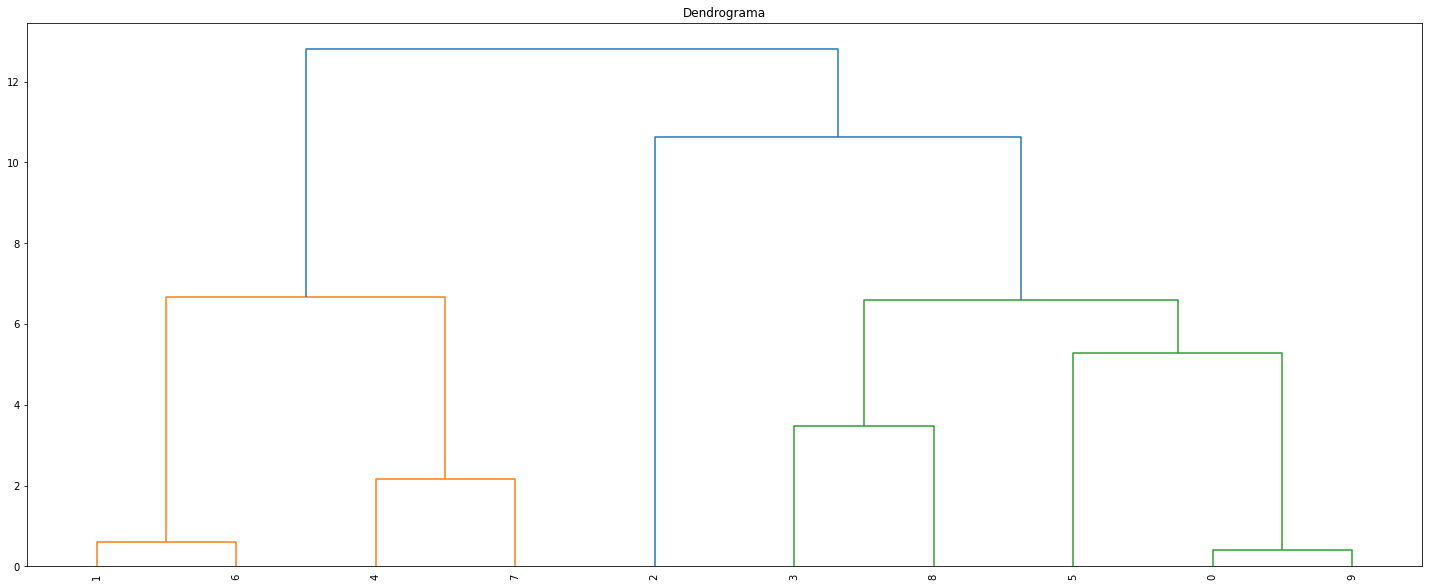

In [28]:
plt.figure(figsize= (25,10))
plt.title("Dendrograma")
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.show()